In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Задание:

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

5.* Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [5]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [6]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[2, :] = standard_scale(X[2, :])

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [9]:
def calc_logloss(y, y_pred):
    y_pred_new = np.where(y_pred == 1, y_pred - 1e-7, np.where(y_pred == 0, y_pred + 1e+7, y_pred))
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))  
    err = np.sum(err)    
    return err

In [10]:
#Применение: 

y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [11]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [12]:
z = np.linspace(-10, 10, 101)

In [13]:
probabilities = sigmoid(z)
probabilities

array([4.53978687e-05, 5.54485247e-05, 6.77241496e-05, 8.27172229e-05,
       1.01029194e-04, 1.23394576e-04, 1.50710358e-04, 1.84071905e-04,
       2.24816770e-04, 2.74578156e-04, 3.35350130e-04, 4.09567165e-04,
       5.00201107e-04, 6.10879359e-04, 7.46028834e-04, 9.11051194e-04,
       1.11253603e-03, 1.35851995e-03, 1.65880108e-03, 2.02532039e-03,
       2.47262316e-03, 3.01841632e-03, 3.68423990e-03, 4.49627316e-03,
       5.48629890e-03, 6.69285092e-03, 8.16257115e-03, 9.95180187e-03,
       1.21284350e-02, 1.47740317e-02, 1.79862100e-02, 2.18812709e-02,
       2.65969936e-02, 3.22954647e-02, 3.91657228e-02, 4.74258732e-02,
       5.73241759e-02, 6.91384203e-02, 8.31726965e-02, 9.97504891e-02,
       1.19202922e-01, 1.41851065e-01, 1.67981615e-01, 1.97816111e-01,
       2.31475217e-01, 2.68941421e-01, 3.10025519e-01, 3.54343694e-01,
       4.01312340e-01, 4.50166003e-01, 5.00000000e-01, 5.49833997e-01,
       5.98687660e-01, 6.45656306e-01, 6.89974481e-01, 7.31058579e-01,
      

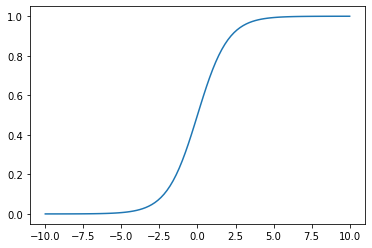

In [14]:
plt.plot(z, probabilities)
plt.show()

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [16]:
def eval_model_new(X, y, alpha=1e-4, min_error_dist=1e-5, outp_log=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    iter_num = 0
    error_dist = np.inf
    min_err = np.inf
    errors = []
    outp_index = 10**(-np.log10(min_error_dist)-2) if -np.log10(min_error_dist)-2>=1 else 1
    while error_dist > min_error_dist:    
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        errors.append(err)
        error_dist = min_err - err
        if error_dist > min_error_dist:
            min_err = err
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        iter_num += 1
        if outp_log:
            if iter_num % outp_index == 0:
                print(iter_num, W, err)
    if outp_log:
        print(iter_num, W, err)
    return W, min_err, iter_num


In [17]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105476
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515639
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236779


In [18]:
W_new = eval_model_new(X_st, y, alpha=1e-4, outp_log=True)

1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236779
6000 [ 0.34724493 -0.64428604  0.63950214  1.31709536] 0.5382699679862313
6102 [ 0.34580919 -0.6469109   0.63997103  1.31584938] 0.537218051218537


In [19]:
def get_alpha(X, y, alphas):
    alphas_list=[]
    for alpha in alphas:
        W,err,n_iter = eval_model_new(X, y, alpha=alpha)
        alphas_list.append((alpha,err,n_iter))
    alphas_list.sort(key=lambda x:x[1])
    print(f'best - alpha: {alphas_list[0][0]},\nresults:\nerr: {alphas_list[0][1]},\nn_iter: {alphas_list[0][2]}')
    return alphas_list[0]

In [20]:
alphas=[
    1, 0.5,0.1,0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001, 0.000005, 0.000001, 0.0000005, 0.0000001
]
get_alpha(X_st, y, alphas)

best - alpha: 0.5,
results:
err: 0.17451429964096335,
n_iter: 5588


(0.5, 0.17451429964096335, 5588)

In [21]:
alphas=np.arange(1,10)/10
get_alpha(X_st, y, alphas)

best - alpha: 0.6,
results:
err: 0.16583588446774866,
n_iter: 5449


(0.6, 0.16583588446774866, 5449)

In [22]:
W_new = eval_model_new(X_st, y, alpha=0.6, outp_log=True)

1000 [-8.22705654 -1.19179224 -1.63103389  7.14617725] 0.2597559875895107
2000 [-11.81693228  -1.47202752  -2.74842535   9.99506855] 0.22216059780510222
3000 [-14.60325068  -1.70958893  -3.58457685  12.24861365] 0.19942508537234377
4000 [-16.96660182  -1.91673038  -4.28184084  14.16798183] 0.1830620510486846
5000 [-19.03415014  -2.10036075  -4.88520289  15.84885732] 0.1705473305742658
5449 [-19.88574828  -2.17646118  -5.13220561  16.54128089] 0.16582588601760145


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).



In [23]:
def calc_pred_proba(w, x):
    z = np.dot(w, x)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [24]:
y_pred_prob = calc_pred_proba(W, X_st)
y_pred_prob

array([0.61284043, 0.67292861, 0.81854116, 0.13481741, 0.85958229,
       0.81228146, 0.87916144, 0.39610207, 0.59717774, 0.86226561])

In [25]:
y_pred_prob = calc_pred_proba(W_new[0], X_st)
y_pred_prob

array([3.79075791e-01, 6.84786993e-02, 9.99986668e-01, 3.50840343e-05,
       8.37531436e-01, 1.83584725e-01, 9.99998324e-01, 5.33913207e-02,
       5.08932298e-01, 9.99812077e-01])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [26]:
def calc_pred(W, X):
    pred_proba = sigmoid(np.dot(W, X))
    y_pred = np.zeros_like(pred_proba)
    prob_lim = 0.5
    for idx, prob in enumerate(pred_proba):
        if prob > prob_lim:
            y_pred[idx] = 1
    return y_pred

In [27]:
y_pred = calc_pred(W, X_st)
y_pred

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

In [28]:
y_pred = calc_pred(W_new[0], X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [29]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

5*. Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}]$$

In [30]:
def accuracy(y, y_pred):
    l = len(y)
    TP_TN = 0
    for i in range(l):
        TP_TN += int(y[i]==y_pred[i])
    result = TP_TN / l
    return result

In [31]:
accuracy_score(y, y_pred), accuracy(y, y_pred)

(1.0, 1.0)

In [32]:
def mk_confusion_matrix(y, y_pred):
    n_classes=len(np.unique(y))
    l=len(y)
    conf_matr=np.zeros((n_classes,n_classes), dtype='int')
    for i in range(l):
        conf_matr[int(y[i])][int(y_pred[i])] += 1
    return conf_matr  

In [33]:
confusion_matrix(y, y_pred), mk_confusion_matrix(y, y_pred)

(array([[5, 0],
        [0, 5]]),
 array([[5, 0],
        [0, 5]]))

In [34]:
def mk_precision(y, y_pred):
    TN, FP, FN, TP = mk_confusion_matrix(y, y_pred).ravel()
    return TP/(TP+FP)

In [35]:
precision_score(y, y_pred), mk_precision(y, y_pred)

(1.0, 1.0)

In [36]:
def mk_recall(y, y_pred):
    TN, FP, FN, TP = mk_confusion_matrix(y, y_pred).ravel()
    return TP/(TP+FN)

In [37]:
recall_score(y, y_pred), mk_recall(y, y_pred)

(1.0, 1.0)

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}$$

In [38]:
def mk_f_score(y, y_pred, beta=1):
    precision = mk_precision(y, y_pred)
    recall = mk_recall(y, y_pred)
    f_score = (1 + beta**2) * (precision * recall)/(beta**2 * precision + recall)
    return f_score

In [39]:
f1_score(y, y_pred), mk_f_score(y, y_pred)

(1.0, 1.0)